<a href="https://colab.research.google.com/github/akr1139/AutoEncoders/blob/main/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array


from matplotlib.pyplot import imshow
import numpy as np
import cv2

In [22]:
SIZE =256

img_data=[]

img=cv2.imread('/content/aj.jpg',1)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(SIZE,SIZE))
img_data.append(img_to_array(img))



img_array=np.reshape(img_data, (len(img_data), SIZE,SIZE,3))
img_array=img_array.astype('float32')/256

print(img_array)

# print(np.shape(img_array))



[[[[0.1875     0.21875    0.16796875]
   [0.19140625 0.22265625 0.171875  ]
   [0.19140625 0.22265625 0.171875  ]
   ...
   [0.76953125 0.7734375  0.78125   ]
   [0.7734375  0.77734375 0.78515625]
   [0.78125    0.78515625 0.79296875]]

  [[0.1875     0.21875    0.16796875]
   [0.1875     0.21875    0.16796875]
   [0.1875     0.21875    0.16796875]
   ...
   [0.76953125 0.7734375  0.78125   ]
   [0.77734375 0.78125    0.7890625 ]
   [0.78125    0.78515625 0.79296875]]

  [[0.1875     0.21875    0.16796875]
   [0.1875     0.21875    0.16796875]
   [0.1875     0.21875    0.16796875]
   ...
   [0.76953125 0.7734375  0.78125   ]
   [0.77734375 0.78125    0.7890625 ]
   [0.78515625 0.7890625  0.796875  ]]

  ...

  [[0.3046875  0.32421875 0.2421875 ]
   [0.30859375 0.328125   0.2421875 ]
   [0.30859375 0.328125   0.2421875 ]
   ...
   [0.7421875  0.73828125 0.7578125 ]
   [0.76171875 0.76171875 0.76953125]
   [0.65625    0.65234375 0.671875  ]]

  [[0.30859375 0.328125   0.2421875 ]
   [0.3

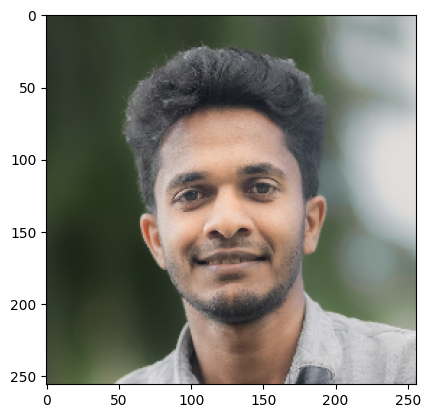

In [31]:
imshow(img)

In [23]:

model =Sequential ()
model.add(Conv2D(32,(3,3), activation='relu', padding='same', input_shape= (SIZE, SIZE, 3)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(8,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(8,(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(8,(3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(UpSampling2D ((2,2)))
model.add(Conv2D(3,(3,3), activation='relu', padding='same'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[ 'accuracy'])
model.summary  ()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 32, 32, 8)       

In [32]:
model.fit(img_array,img_array,epochs=500,shuffle=True)

Epoch 1/500
1/1 [==============================] - 0s 452ms/step - loss: 0.0078 - accuracy: 0.5630
Epoch 2/500
1/1 [==============================] - 0s 436ms/step - loss: 0.0076 - accuracy: 0.5703
Epoch 3/500
1/1 [==============================] - 0s 456ms/step - loss: 0.0075 - accuracy: 0.5791
Epoch 4/500
1/1 [==============================] - 0s 476ms/step - loss: 0.0074 - accuracy: 0.5853
Epoch 5/500
1/1 [==============================] - 0s 490ms/step - loss: 0.0073 - accuracy: 0.5907
Epoch 6/500
1/1 [==============================] - 1s 502ms/step - loss: 0.0072 - accuracy: 0.5962
Epoch 7/500
1/1 [==============================] - 0s 491ms/step - loss: 0.0071 - accuracy: 0.5994
Epoch 8/500
1/1 [==============================] - 0s 469ms/step - loss: 0.0070 - accuracy: 0.6001
Epoch 9/500
1/1 [==============================] - 0s 417ms/step - loss: 0.0070 - accuracy: 0.6010
Epoch 10/500
1/1 [==============================] - 0s 489ms/step - loss: 0.0070 - accuracy: 0.6016
Epoch 11/

1/1 [==============================] - 0s 72ms/step


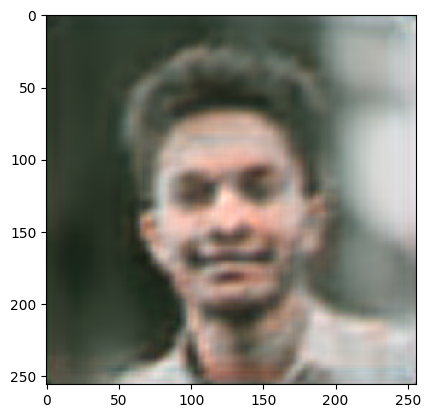

In [33]:
pred=model.predict(img_array)
imshow(pred[0].reshape(SIZE,SIZE,3))